In [1]:
%matplotlib inline

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning

### Pew research

In [35]:
pew_religion_salary = pd.read_csv("pew.csv")

In [36]:
pew_religion_salary

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [55]:
tidy_pew = pew_religion_salary.melt(id_vars = ["religion"], var_name = "income", value_name = "frequency")

In [56]:
tidy_pew

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [57]:
tidy_pew.columns

Index(['religion', 'income', 'frequency'], dtype='object')

In [58]:
tidy_pew.dtypes

religion     object
income       object
frequency     int64
dtype: object

In [59]:
tidy_pew = tidy_pew.select_dtypes(include=["object"]).astype("category")

# tidy_pew.religion = tidy_pew.religion.astype("category")
# tidy_pew.income = tidy_pew.income.astype("category")

In [60]:
tidy_pew.dtypes

religion     category
income       category
frequency       int64
dtype: object

### Tuberculosis research

In [76]:
tb_research = pd.read_csv("tb.csv")

In [77]:
tb_research

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [78]:
tb_research.columns

Index(['iso2', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [90]:
tb_research.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [102]:
tb_research[(tb_research.year == 1989) & (tb_research.iso2 == "AD")].values # values ​​in the entire row are missing

array([['AD', 1989, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=object)

In [100]:
tb_research.describe().T # "count" gives the number of non-missing values

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [105]:
tidy_tb_research = tb_research.melt(id_vars = ["iso2", "year"], var_name = "gender_and_age", value_name = "frequency")

In [123]:
tidy_tb_research["gender"] = tidy_tb_research.gender_and_age.str.slice(0, 1)

In [124]:
tidy_tb_research["gender"].unique()

array(['m', 'f'], dtype=object)

In [125]:
tidy_tb_research["age_group"] = tidy_tb_research.gender_and_age.str.slice(1)

In [126]:
tidy_tb_research["age_group"].unique()

array(['04', '514', '014', '1524', '2534', '3544', '4554', '5564', '65',
       'u'], dtype=object)

In [127]:
new_tidy_tb_research = tidy_tb_research.drop(columns = "gender_and_age")

In [128]:
new_tidy_tb_research

,iso2,year,frequency,gender,age_group
0,AD,1989,NaN,m,04
1,AD,1990,NaN,m,04
2,AD,1991,NaN,m,04
3,AD,1992,NaN,m,04
4,AD,1993,NaN,m,04
...,...,...,...,...,...
115375,ZW,2004,NaN,f,u
115376,ZW,2005,NaN,f,u
115377,ZW,2006,NaN,f,u
115378,ZW,2007,NaN,f,u


In [131]:
new_tidy_tb_research.describe().T

,count,mean,std,min,25%,50%,75%,max
year,115380.0,1994.229329,8.422571,1980.0,1987.0,1994.0,2002.0,2008.0
frequency,35750.0,609.378881,3278.187960,0.0,4.0,36.0,245.0,90498.0


In [132]:
new_tidy_tb_research_nona = new_tidy_tb_research.dropna()

In [133]:
new_tidy_tb_research_nona

,iso2,year,frequency,gender,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [137]:
new_tidy_tb_research_nona.frequency.mean()

611.1249437443745

In [141]:
new_tidy_tb_research_nona[new_tidy_tb_research_nona.iso2 == "ZM"].frequency.mean()

1011.7734375

In [377]:
new_tidy_tb_research_nona.age_group.unique()

['0-4', '5-14', '0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65+', 'unknown']
Categories (10, object): ['0-14', '0-4', '15-24', '25-34', ..., '5-14', '55-64', '65+', 'unknown']

In [153]:
# function that changes column "age_group" in more readable form:
def process_age_group(age_group): 
    correct_age_titles = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in correct_age_titles:
        return correct_age_titles[age_group]
        
    return f"{age_group[:-2]}-{age_group[-2:]}"

In [156]:
process_age_group("2534")

'25-34'

In [159]:
# .apply(func) - applies the given function to each value in the column
new_tidy_tb_research_nona.age_group = new_tidy_tb_research_nona.age_group.apply(process_age_group)

C:\Users\USER\AppData\Local\Temp\ipykernel_6652\1761959006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tidy_tb_research_nona.age_group = new_tidy_tb_research_nona.age_group.apply(process_age_group)


In [281]:
new_tidy_tb_research_nona

,iso2,year,gender,age_group,frequency
15,AD,2005,m,0-4,0
16,AD,2006,m,0-4,0
18,AD,2008,m,0-4,0
42,AE,2006,m,0-4,0
43,AE,2007,m,0-4,0
...,...,...,...,...,...
115195,VU,2008,f,unknown,0
115269,YE,2008,f,unknown,0
115323,ZA,2008,f,unknown,0
115350,ZM,2008,f,unknown,0


In [378]:
total_deaths = new_tidy_tb_research_nona["frequency"].sum()
print(f"Total number of deaths cases: {int(total_deaths)}.")

Total number of deaths cases: 21726714.


In [379]:
country_frequency = new_tidy_tb_research_nona.groupby("iso2")["frequency"].sum()
country_with_max_deaths = country_frequency.idxmax()
country_max_deaths_count = country_frequency.max()
print(f"Country {country_with_max_deaths} has the most deaths cases: {int(country_max_deaths_count)}")

Country CN has the most deaths cases: 4065174


The age group 25-34 has the most deaths cases: 5167957.


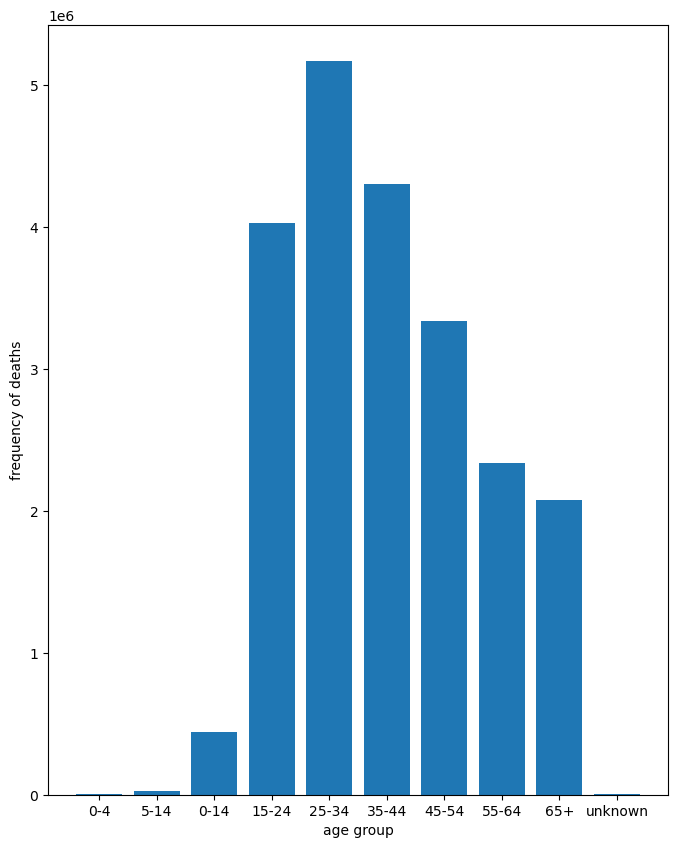

In [421]:
age_group_order = ["0-4", "5-14", "0-14", "15-24", "25-34", "35-44", "45-54", "55-64", "65+", "unknown"]
new_tidy_tb_research_nona["age_group"] = pd.Categorical(new_tidy_tb_research_nona["age_group"], categories=age_group_order)
age_group_frequency = new_tidy_tb_research_nona.groupby("age_group", observed=True)["frequency"].sum()
age_group_max_deaths = age_group_frequency.idxmax()
age_group_max_deaths_count = age_group_frequency.max()
print(f"The age group {age_group_max_deaths} has the most deaths cases: {int(age_group_max_deaths_count)}.")

plt.figure(figsize=(8, 10))
plt.bar(age_group_frequency.index, age_group_frequency.values)
plt.xlabel("age group")
plt.ylabel("frequency of deaths")
plt.show()

In 2008 there were the most deaths cases: 2643661.


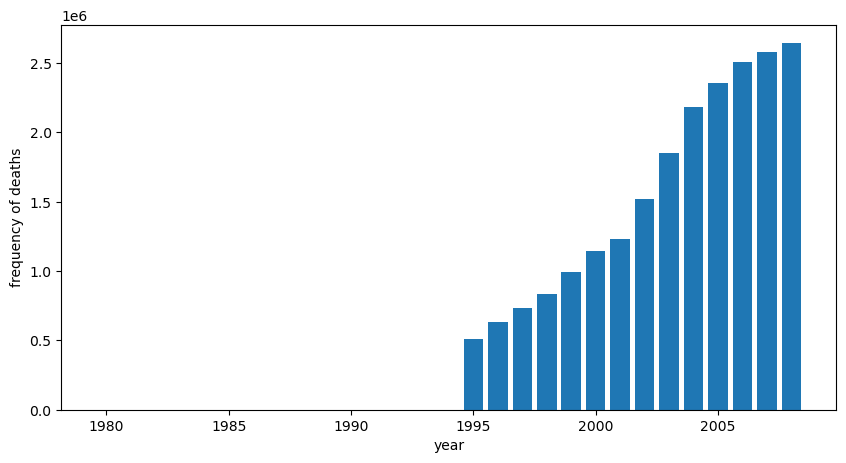

In [381]:
year_frequency = new_tidy_tb_research_nona.groupby("year")["frequency"].sum()
year_with_max_deaths = year_frequency.idxmax()
year_with_max_deaths_count = year_frequency.max()
print(f"In {year_with_max_deaths} there were the most deaths cases: {int(year_with_max_deaths_count)}.")

plt.figure(figsize=(10, 5))
plt.bar(year_frequency.index, year_frequency.values)
plt.xlabel("year")
plt.ylabel("frequency of deaths")
plt.show()

Gender 'm' has more death cases: 13967317, than gender 'f' with 7759397 death cases.


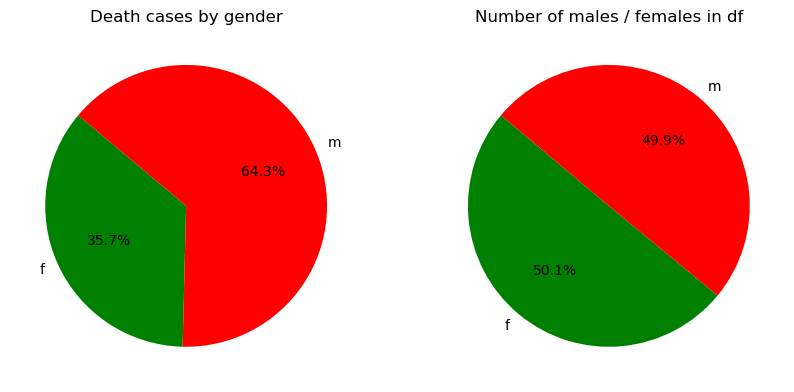

In [452]:
gender_frequency = new_tidy_tb_research_nona.groupby("gender", observed=True)["frequency"].sum()
gender_with_more_deaths = gender_frequency.idxmax()
gender_with_less_deaths = gender_frequency.idxmin()
gender_with_more_deaths_count = gender_frequency.max()
gender_with_less_deaths_count = gender_frequency.min()
print(f"Gender '{gender_with_more_deaths}' has more death cases: {int(gender_with_more_deaths_count)}, "
      f"than gender '{gender_with_less_deaths}' with {gender_with_less_deaths_count} death cases.")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(gender_frequency, labels=gender_frequency.index, autopct="%1.1f%%", colors = ["green", "red"], startangle=140)
ax1.set_title("Death cases by gender")
ax2.pie(new_tidy_tb_research_nona.gender.value_counts(), labels=gender_frequency.index, autopct="%1.1f%%", colors = ["green", "red"], startangle=140)
ax2.set_title("Number of males / females in df")
plt.show()

In [453]:
new_tidy_tb_research_nona.gender = new_tidy_tb_research_nona.gender.astype("category")
new_tidy_tb_research_nona.age_group = new_tidy_tb_research_nona.age_group.astype("category")

In [454]:
new_tidy_tb_research_nona.dtypes

iso2           object
year            int64
gender       category
age_group    category
frequency       int32
dtype: object

In [455]:
new_tidy_tb_research_nona = new_tidy_tb_research_nona[["iso2", "year", "gender", "age_group", "frequency"]]

In [456]:
new_tidy_tb_research_nona

,iso2,year,gender,age_group,frequency
71437,HT,1997,f,0-14,149
17276,ZM,2007,m,0-14,152
17300,ZW,2002,m,0-14,191
15756,PL,2003,m,0-14,2
17305,ZW,2007,m,0-14,138
...,...,...,...,...,...
55302,MN,2008,m,unknown,0
55273,MM,2008,m,unknown,0
55244,ML,2008,m,unknown,0
55434,MT,2005,m,unknown,0


In [457]:
new_tidy_tb_research_nona.frequency = new_tidy_tb_research_nona.frequency.astype(int)

In [458]:
# sort entries by iso2, if there are more than one entries with same country then sort by year:
sorted_tidy_tb_research = new_tidy_tb_research_nona.sort_values(["iso2", "year"])

In [459]:
sorted_tidy_tb_research = sorted_tidy_tb_research.reset_index(drop=True)

In [460]:
sorted_tidy_tb_research

,iso2,year,gender,age_group,frequency
0,AD,1996,f,0-14,0
1,AD,1996,m,0-14,0
2,AD,1996,f,15-24,1
3,AD,1996,m,15-24,0
4,AD,1996,f,25-34,1
...,...,...,...,...,...
35547,ZW,2008,f,55-64,174
35548,ZW,2008,m,65+,185
35549,ZW,2008,f,65+,105
35550,ZW,2008,m,unknown,0


In [461]:
sorted_tidy_tb_research.to_csv("tidy_tb_research.csv", index = None)

### Weather

In [287]:
weather_df = pd.read_csv("weather.csv")

In [288]:
weather_df

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [289]:
weather_df = weather_df.melt(id_vars=["id", "year", "month", "element"], var_name="day")

In [290]:
weather_df.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

In [291]:
weather_df.day = weather_df.day.str.slice(1) # crop first char in day: d1 -> 1

In [558]:
weather_df.day = weather_df.day.astype(int) # change day's type from char to int 

In [559]:
weather_tidy = weather_df.dropna()

In [560]:
data = ["id", "year", "month", "day"]
weather_tidy = weather_tidy.pivot_table(index = data, columns = "element", values = "value")

In [561]:
weather_tidy = weather_tidy.reset_index()

In [577]:
weather_tidy

element,id,year,month,day,tmax,tmin,date
0,MX17004,2010,1,30,27.8,14.5,2010-01-30
1,MX17004,2010,2,2,27.3,14.4,2010-02-02
2,MX17004,2010,2,3,24.1,14.4,2010-02-03
3,MX17004,2010,2,11,29.7,13.4,2010-02-11
4,MX17004,2010,2,23,29.9,10.7,2010-02-23
5,MX17004,2010,3,5,32.1,14.2,2010-03-05
6,MX17004,2010,3,10,34.5,16.8,2010-03-10
7,MX17004,2010,3,16,31.1,17.6,2010-03-16
8,MX17004,2010,4,27,36.3,16.7,2010-04-27
9,MX17004,2010,5,27,33.2,18.2,2010-05-27


In [578]:
weather_tidy["date"] = pd.to_datetime(weather_tidy[["year", "month", "day"]]) # create new column 'date'

In [579]:
datetime_weather_tidy = weather_tidy.drop(columns = ["year", "month", "day"])

In [584]:
datetime_weather_tidy

element,id,tmax,tmin,date
0,MX17004,27.8,14.5,2010-01-30
1,MX17004,27.3,14.4,2010-02-02
2,MX17004,24.1,14.4,2010-02-03
3,MX17004,29.7,13.4,2010-02-11
4,MX17004,29.9,10.7,2010-02-23
5,MX17004,32.1,14.2,2010-03-05
6,MX17004,34.5,16.8,2010-03-10
7,MX17004,31.1,17.6,2010-03-16
8,MX17004,36.3,16.7,2010-04-27
9,MX17004,33.2,18.2,2010-05-27


In [585]:
datetime_weather_tidy = datetime_weather_tidy[["id", "date", "tmax", "tmin"]]

In [586]:
datetime_weather_tidy

element,id,date,tmax,tmin
0,MX17004,2010-01-30,27.8,14.5
1,MX17004,2010-02-02,27.3,14.4
2,MX17004,2010-02-03,24.1,14.4
3,MX17004,2010-02-11,29.7,13.4
4,MX17004,2010-02-23,29.9,10.7
5,MX17004,2010-03-05,32.1,14.2
6,MX17004,2010-03-10,34.5,16.8
7,MX17004,2010-03-16,31.1,17.6
8,MX17004,2010-04-27,36.3,16.7
9,MX17004,2010-05-27,33.2,18.2


### Billboards

In [3]:
billboard = pd.read_csv("billboard.csv")

In [4]:
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
billboard.columns.unique()

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [6]:
billboard[billboard.columns[-15:]].describe().T

,count,mean,std,min,25%,50%,75%,max
wk62,2.0,44.5,3.535534,42.0,43.25,44.5,45.75,47.0
wk63,2.0,47.5,3.535534,45.0,46.25,47.5,48.75,50.0
wk64,2.0,50.0,0.000000,50.0,50.00,50.0,50.00,50.0
wk65,1.0,49.0,NaN,49.0,49.00,49.0,49.00,49.0
wk66,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk71,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
billboard = billboard.rename(columns= {"date.entered": "date_entered"}) # rename column

In [8]:
billboard["date_entered"] = pd.to_datetime(billboard["date_entered"]) # convert column to type 'datetime'

In [9]:
data = ["year", "artist", "track", "time", "date_entered"]
billboard_tidy = billboard.melt(id_vars = data, var_name = "week", value_name = "place")

In [10]:
billboard_tidy

,year,artist,track,time,date_entered,week,place
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [13]:
billboard_tidy = billboard_tidy.dropna() # remove NaN

In [14]:
billboard_tidy

,year,artist,track,time,date_entered,week,place
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


In [15]:
billboard_tidy.place = billboard_tidy.place.astype(int)

In [16]:
billboard_tidy.dtypes

year                     int64
artist                  object
track                   object
time                    object
date_entered    datetime64[ns]
week                    object
place                    int32
dtype: object

In [17]:
billboard_tidy.year.unique()

array([2000], dtype=int64)

In [18]:
billboard_tidy.week = billboard_tidy.week.str.slice(2).astype(int)

In [19]:
billboard_tidy

,year,artist,track,time,date_entered,week,place
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45
20033,2000,Creed,Higher,5:16,1999-09-11,64,50
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50


In [20]:
billboard_tidy.dtypes

year                     int64
artist                  object
track                   object
time                    object
date_entered    datetime64[ns]
week                     int32
place                    int32
dtype: object

In [21]:
pd.Timedelta(7, "day") # or:  pd.Timedelta(1, "w")

Timedelta('7 days 00:00:00')

In [22]:
intervals = billboard_tidy.week.apply(lambda x: pd.Timedelta(x - 1, "w"))

In [23]:
billboard_tidy["date"] = billboard_tidy["date_entered"] + intervals

In [36]:
billboard_tidy_clean = billboard_tidy

In [37]:
billboard_tidy_clean[billboard_tidy_clean.track == "Higher"]

,year,artist,track,time,date_entered,week,place,date
62,2000,Creed,Higher,5:16,1999-09-11,1,81,1999-09-11
379,2000,Creed,Higher,5:16,1999-09-11,2,77,1999-09-18
696,2000,Creed,Higher,5:16,1999-09-11,3,73,1999-09-25
1013,2000,Creed,Higher,5:16,1999-09-11,4,63,1999-10-02
1330,2000,Creed,Higher,5:16,1999-09-11,5,61,1999-10-09
1647,2000,Creed,Higher,5:16,1999-09-11,6,58,1999-10-16
1964,2000,Creed,Higher,5:16,1999-09-11,7,56,1999-10-23
2281,2000,Creed,Higher,5:16,1999-09-11,8,52,1999-10-30
2598,2000,Creed,Higher,5:16,1999-09-11,9,56,1999-11-06
2915,2000,Creed,Higher,5:16,1999-09-11,10,57,1999-11-13


In [38]:
billboard_tidy_clean = billboard_tidy_clean.drop(columns = ["date_entered", "week"])

In [39]:
billboard_tidy_clean = billboard_tidy_clean[["year", "artist", "track", "time", "date", "place"]]

In [40]:
billboard_tidy_clean = billboard_tidy_clean.reset_index(drop=True)

In [41]:
billboard_tidy_clean

,year,artist,track,time,date,place
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...
5302,2000,Creed,Higher,5:16,2000-11-18,50
5303,2000,Lonestar,Amazed,4:25,2000-08-12,45
5304,2000,Creed,Higher,5:16,2000-11-25,50
5305,2000,Lonestar,Amazed,4:25,2000-08-19,50


In [42]:
billboard_tidy_clean[billboard_tidy_clean.place == 1] # all track that were at 1st place

,year,artist,track,time,date,place
1697,2000,Madonna,Music,3:45,2000-09-16,1
1972,2000,Madonna,Music,3:45,2000-09-23,1
2087,2000,"Aguilera, Christina",What A Girl Wants,3:18,2000-01-15,1
2234,2000,Madonna,Music,3:45,2000-09-30,1
2294,2000,Sisqo,Incomplete,3:52,2000-08-12,1
2347,2000,"Aguilera, Christina",What A Girl Wants,3:18,2000-01-22,1
2394,2000,Destiny's Child,Independent Women Pa...,3:38,2000-11-18,1
2490,2000,Madonna,Music,3:45,2000-10-07,1
2540,2000,Santana,"Maria, Maria",4:18,2000-04-08,1
2548,2000,Sisqo,Incomplete,3:52,2000-08-19,1


In [44]:
billboard_tidy_clean[billboard_tidy_clean.place == 1].artist.unique() # all artist whose tracks were at 1st place

array(['Madonna', 'Aguilera, Christina', 'Sisqo', "Destiny's Child",
       'Santana', 'Carey, Mariah', 'Janet', 'Iglesias, Enrique', "N'Sync",
       'matchbox twenty', 'Aaliyah', 'Savage Garden', 'Vertical Horizon',
       'Creed', 'Lonestar'], dtype=object)

In [47]:
billboard_tidy_clean[billboard_tidy_clean.place == 1].artist.value_counts() # for each artist, how many of their songs were at 1st place

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64

In [53]:
billboard_tidy_clean.artist.value_counts()

artist
Creed               104
Lonestar             95
Destiny's Child      92
Sisqo                74
N'Sync               74
                   ... 
Zombie Nation         2
Estefan, Gloria       1
Fragma                1
Master P              1
Ghostface Killah      1
Name: count, Length: 228, dtype: int64

### Other weather data

In [82]:
weather_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [83]:
weather_data

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [84]:
weather_data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [85]:
weather_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew", "mean_dew", "min_dew", "max_humidity", "mean_humidity", "min_humidity",
                        "max_pressure", "mean_pressure", "min_pressure", "max_visibility", "mean_visibility", "min_visibility", "max_wind", "mean_wind", 
                        "max_gusts", "precipitation", "cloud_cover", "events", "wind_dir"]

In [86]:
weather_data

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [87]:
weather_data.dtypes

date                object
max_temp             int64
mean_temp            int64
min_temp             int64
max_dew              int64
mean_dew             int64
min_dew              int64
max_humidity         int64
mean_humidity        int64
min_humidity         int64
max_pressure       float64
mean_pressure      float64
min_pressure       float64
max_visibility       int64
mean_visibility      int64
min_visibility       int64
max_wind             int64
mean_wind            int64
max_gusts          float64
precipitation       object
cloud_cover          int64
events              object
wind_dir             int64
dtype: object

In [88]:
weather_data.date = pd.to_datetime(weather_data.date) 

In [91]:
weather_data.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [102]:
len(weather_data[weather_data.precipitation == "T"]) # number of entries which column "precipitation" = "T"

36

In [103]:
weather_data.loc[weather_data.precipitation == "T", "precipitation"] = 1e-5 # "T" value in precipitation column has replaced with 1e-5 

In [107]:
weather_data.precipitation = weather_data.precipitation.astype(float) # convert precipitation column type from object to float

In [109]:
weather_data

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-03-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00000,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,0.00001,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03000,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00000,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00000,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-03-06,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04000,8,Snow,314
362,2013-03-07,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00000,8,NaN,342
363,2013-03-08,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00000,1,NaN,90
364,2013-03-09,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,0.00001,2,NaN,141


In [110]:
weather_data.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [111]:
weather_data.events.value_counts(dropna = False)

events
NaN                           204
Rain                           69
Rain-Thunderstorm              26
Fog                            13
Snow                           13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Fog-Rain-Snow                   3
Rain-Snow                       3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: count, dtype: int64

In [285]:
# function that converts temperature from Fahrenheit to Celsius:
def convert_F_to_C(temp):
    return round((temp - 32) * 5/9)

In [306]:
weather_data.max_temp = weather_data.max_temp.apply(convert_F_to_C)
weather_data.mean_temp = weather_data.mean_temp.apply(convert_F_to_C)
weather_data.min_temp = weather_data.min_temp.apply(convert_F_to_C)                                         

In [314]:
weather_data

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-03-10,13,4,-4,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00000,0,NaN,138
1,2012-03-11,19,9,-1,43,31,24,78,53,28,...,10,10,10,22,7,32.0,0.00001,1,Rain,163
2,2012-03-12,22,17,12,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03000,6,Rain,190
3,2012-03-13,24,17,10,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00000,0,NaN,242
4,2012-03-14,27,17,7,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00000,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-03-06,0,-1,-2,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04000,8,Snow,314
362,2013-03-07,2,0,-2,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00000,8,NaN,342
363,2013-03-08,8,2,-5,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00000,1,NaN,90
364,2013-03-09,13,7,1,32,29,23,75,57,38,...,10,10,10,16,10,24.0,0.00001,2,NaN,141


In [310]:
weather_data.max_temp.max() # max_value of max_temp

41

In [311]:
weather_data.min_temp.min() # min_value of min_temp

-17

In [312]:
weather_data.mean_temp.max() # max_value of mean_temp

32

In [315]:
weather_data.mean_temp.mean() # mean value of mean_temp

13.150273224043715

In [317]:
weather_data[weather_data.mean_temp == 32] # filter only those entries with max mean_temperature

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
111,2012-06-29,39,32,23,74,66,58,74,50,25,...,10,10,10,22,6,26.0,0.00,0,NaN,268
119,2012-07-07,41,32,22,77,70,56,91,55,19,...,10,9,2,31,3,46.0,0.36,3,Rain-Thunderstorm,133


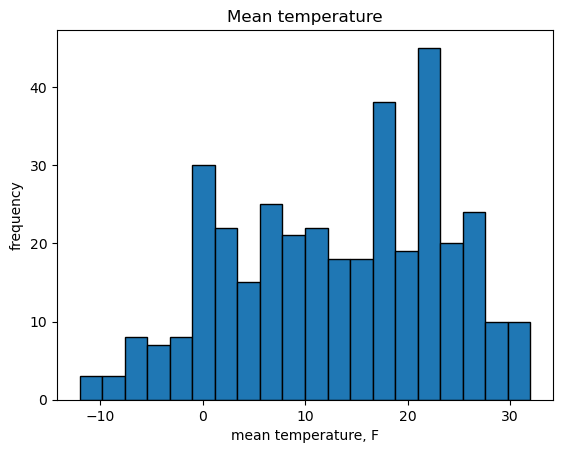

In [318]:
plt.hist(weather_data.mean_temp, bins = 20, edgecolor = "black")
plt.xlabel("mean temperature, C")
plt.ylabel("frequency")
plt.title("Mean temperature")
plt.show()

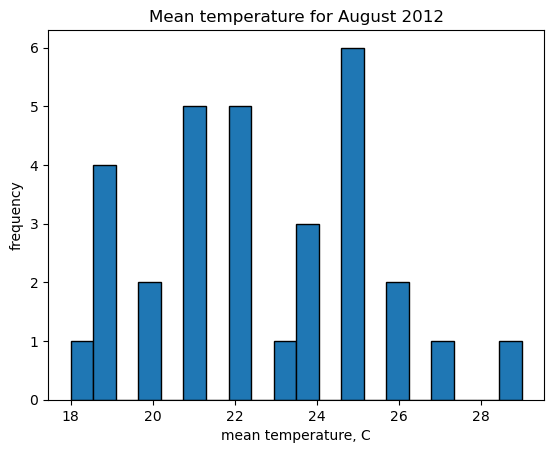

In [324]:
plt.hist(weather_data[weather_data.date.dt.month == 8].mean_temp, bins = 20, edgecolor = "black")
plt.xlabel("mean temperature, C")
plt.ylabel("frequency")
plt.title("Mean temperature for August 2012")
plt.show()

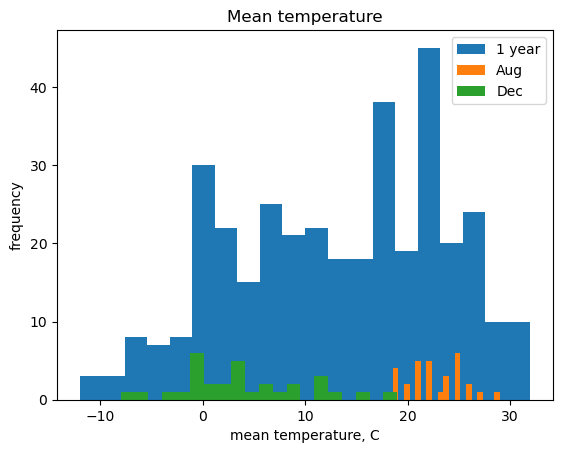

In [325]:
plt.hist(weather_data.mean_temp, bins = 20, label = "1 year")
plt.hist(weather_data[weather_data.date.dt.month == 8].mean_temp, bins = 20, label = "Aug")
plt.hist(weather_data[weather_data.date.dt.month == 12].mean_temp, bins = 20, label = "Dec")
plt.xlabel("mean temperature, C")
plt.ylabel("frequency")
plt.title("Mean temperature")
plt.legend()
plt.show()

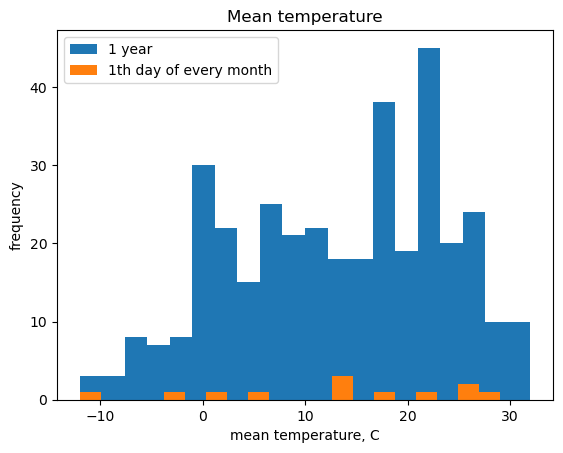

In [331]:
plt.hist(weather_data.mean_temp, bins = 20, label = "1 year")
plt.hist(weather_data[weather_data.date.dt.day == 1].mean_temp, bins = 20, label = "1th day of every month")
plt.xlabel("mean temperature, C")
plt.ylabel("frequency")
plt.title("Mean temperature")
plt.legend()
plt.show()

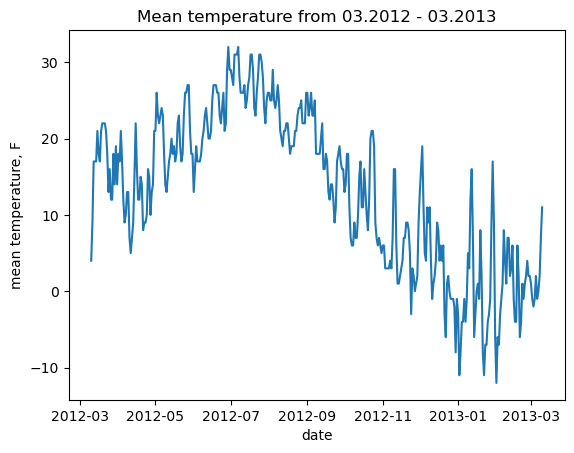

In [332]:
plt.plot(weather_data.date, weather_data.mean_temp)
plt.xlabel("date")
plt.ylabel("mean temperature, F")
plt.title("Mean temperature from 03.2012 - 03.2013")
plt.show()

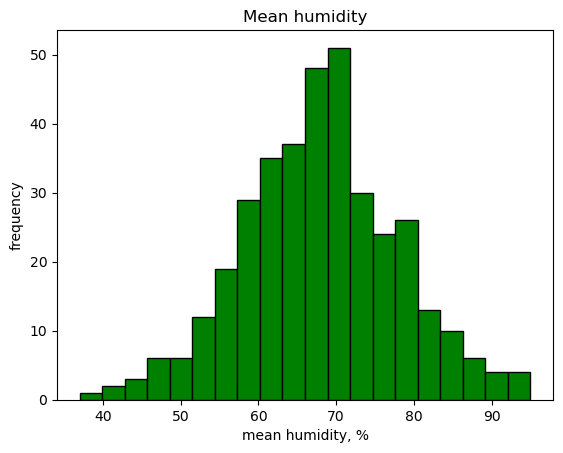

In [333]:
plt.hist(weather_data.mean_humidity, bins = 20, edgecolor = "black", color="g")
plt.xlabel("mean humidity, %")
plt.ylabel("frequency")
plt.title("Mean humidity")
plt.show()

In [334]:
weather_data.mean_humidity.max() # max value of mean_humidity

95

In [335]:
weather_data[weather_data.mean_humidity == 95] # filter only those entries with max mean_humidity

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
206,2012-10-02,16,14,12,58,55,52,100,95,90,...,10,4,2,20,7,26.0,0.19,8,Rain,53
282,2012-12-17,8,4,1,45,39,33,100,95,89,...,10,2,0,14,5,17.0,0.18,8,Fog-Rain,360


In [336]:
weather_data.mean_humidity.mean()

67.86065573770492

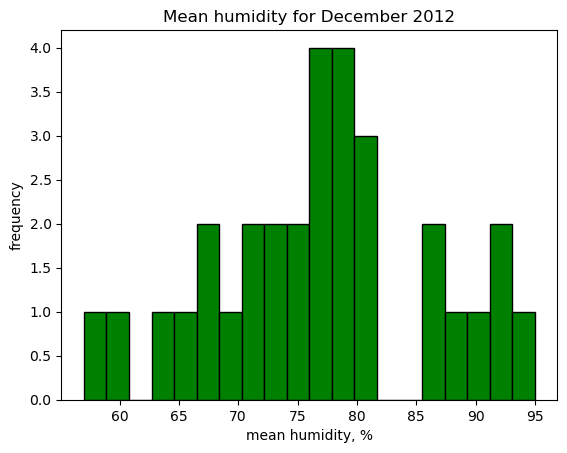

In [337]:
plt.hist(weather_data[weather_data.date.dt.month == 12].mean_humidity, bins = 20, edgecolor = "black", color = "g")
plt.xlabel("mean humidity, %")
plt.ylabel("frequency")
plt.title("Mean humidity for December 2012")
plt.show()

In [338]:
weather_data_date_idx = weather_data.set_index("date") # make date column to index for df

In [341]:
weather_data_date_idx.resample("w") # аll data from weather_data is grouped by week according to weather index values

In [349]:
weather_data_date_idx.resample("w").max_temp.mean() # max temperature for every week in weather_data

date
2012-03-11    16.000000
2012-03-18    25.142857
2012-03-25    25.142857
2012-04-01    22.285714
2012-04-08    19.857143
2012-04-15    17.571429
2012-04-22    19.571429
2012-04-29    19.285714
2012-05-06    28.714286
2012-05-13    23.142857
2012-05-20    27.571429
2012-05-27    29.142857
2012-06-03    25.285714
2012-06-10    27.000000
2012-06-17    30.000000
2012-06-24    32.857143
2012-07-01    35.285714
2012-07-08    37.857143
2012-07-15    32.714286
2012-07-22    34.571429
2012-07-29    34.714286
2012-08-05    33.714286
2012-08-12    31.285714
2012-08-19    28.000000
2012-08-26    30.428571
2012-09-02    29.428571
2012-09-09    28.142857
2012-09-16    25.428571
2012-09-23    19.714286
2012-09-30    21.857143
2012-10-07    17.000000
2012-10-14    17.142857
2012-10-21    17.428571
2012-10-28    19.857143
2012-11-04     9.857143
2012-11-11    13.857143
2012-11-18    11.000000
2012-11-25    12.285714
2012-12-02    11.714286
2012-12-09    14.142857
2012-12-16     9.714286
2012-12-23 

In [350]:
weather_data_date_idx.resample("5D").max_temp.mean() # average temperature in max_temp for every 5 days in weather_data

date
2012-03-10    21.0
2012-03-15    26.4
2012-03-20    25.2
2012-03-25    21.0
2012-03-30    24.2
              ... 
2013-02-18     4.8
2013-02-23     5.8
2013-02-28     2.4
2013-03-05     5.4
2013-03-10    16.0
Freq: 5D, Name: max_temp, Length: 74, dtype: float64

In [352]:
weather_data_date_idx.resample("m").max_temp.mean() # average temperature for max_temp for every month in weather_data

date
2012-03-31    23.363636
2012-04-30    19.566667
2012-05-31    27.258065
2012-06-30    30.100000
2012-07-31    34.967742
2012-08-31    30.645161
2012-09-30    23.966667
2012-10-31    17.064516
2012-11-30    11.533333
2012-12-31     8.354839
2013-01-31     5.032258
2013-02-28     4.857143
2013-03-31     5.200000
Freq: M, Name: max_temp, dtype: float64

In [354]:
weather_data_date_idx.rolling("5D").max_temp.mean() # average temperature in max_temp for 1-5 day, 2-6 day, 3-7 day etc

date
2012-03-10    13.0
2012-03-11    16.0
2012-03-12    18.0
2012-03-13    19.5
2012-03-14    21.0
              ... 
2013-03-06     2.2
2013-03-07     2.6
2013-03-08     3.6
2013-03-09     5.4
2013-03-10     7.8
Name: max_temp, Length: 366, dtype: float64

In [365]:
weather_data[weather_data.date.dt.month == 12].mean_temp.nsmallest(3) # the 3 lowest temperatures in mean_temp for December

295   -8
287   -6
286   -3
Name: mean_temp, dtype: int64

In [372]:
weather_data[weather_data.date.dt.month == 8].max_temp.nlargest(5) # the 5 hightest temperatures in max_temp for August

151    37
145    36
147    36
150    36
144    34
Name: max_temp, dtype: int64